# Convolutional Neural Network Model

This CNN model is designed for facial emotion recognition. It analyzes facial expressions and classifies them into distinct emotion categories using a Convolutional Neural Network (CNN) architecture.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fer2013.csv')

(35887, 3)
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


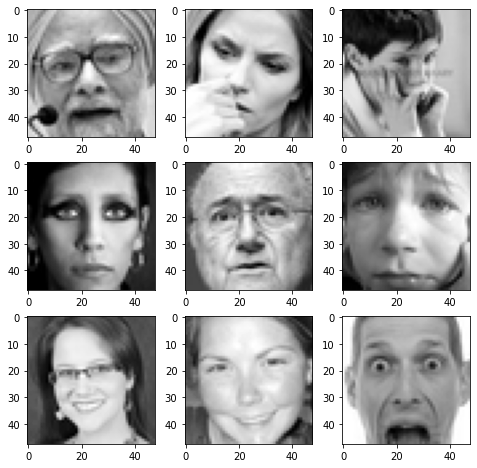

In [3]:
print(data.shape)
print(data.emotion.value_counts())

# plotting sample images
fig = plt.figure(figsize=(8, 8))
for i in range(1, 10):
    img = data.loc[i, 'pixels'].split(' ')
    img = np.array(img, dtype='float32')
    img = img.reshape((48, 48))
    fig.add_subplot(3, 3, i)
    plt.imshow(img, cmap='gray')
plt.show()


### Data Preprocessing

##### This script walks through the phases of data preprocessing for a Facial Emotion Recognition challenge using the dataset.

Preprocessing Steps: 
1. Loading and dividing the dataset into training, validation, and test sets.
2. Resizes the photos to the required scale (e.g., 224x224), normalizes pixel values, and converts labels to one-hot encoded vectors.

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import cv2

# Spliting into train, val, test sets
train_data = data[data.Usage == 'Training']
test_data = data[data.Usage == 'PrivateTest']
val_data = data[data.Usage == 'PublicTest']

# Preprocessing images
def preprocess(data):
    X = []
    y = []
    for i in range(len(data)):
        img = data.iloc[i]['pixels'].split(' ')
        img = np.array(img, dtype='float32')
        img = img.reshape((48, 48))
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(data.iloc[i]['emotion'])
    X = np.array(X) / 255.0
    y = to_categorical(y)
    return X, y

X_train, y_train = preprocess(train_data)
X_val, y_val = preprocess(val_data)
X_test, y_test = preprocess(test_data)


### Building Convolutional Neural Network Model

This script shows how to build a Convolutional Neural Network (CNN) model for Facial Emotion Recognition.

Dependencies:
- keras.models.Sequential
- keras.layers.Conv2D
- keras.layers.MaxPooling2D
- keras.layers.Flatten
- keras.layers.Dense
- keras.layers.Dropout

Steps: 
1. Create the CNN model with a Sequential model.
2. To the model, add Conv2D, MaxPooling2D, Flatten, Dense, and Dropout layers.
3. For each layer, configure the input shape, activation functions, and number of filters.
4. Print the model summary to visualize the network architecture.


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

### Model Training and Evaluation

This is the training and evaluation step for the Facial Emotion Recognition model.

Dependencies:
- keras.optimizers.Adam
- keras.callbacks.ModelCheckpoint

Usage: 

1. Finish the model by defining the optimizer, loss function, and evaluation metrics.
2. Set the ModelCheckpoint callback to save the best model at each checkpoint during training.
3. Train the model with the fit() method, passing in the training and validation data, as well as the number of epochs and batch size.
4. Using the evaluate() method, evaluate the trained model on the test set.
5. Print the test loss and precision.


In [7]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


from keras.callbacks import ModelCheckpoint

checkpoint_path = 'model_checkpoint.h5'

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_loss',
    save_best_only=True,
    verbose=1)

# Training the model with the checkpoint callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    callbacks=[checkpoint_callback])

    
#evaluating the model
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Epoch 1/10
225/225 [==============================] - ETA: 0s - loss: 1.7454 - accuracy: 0.2959 
Epoch 1: val_loss improved from inf to 1.61018, saving model to model_checkpoint.h5
225/225 [==============================] - 6465s 29s/step - loss: 1.7454 - accuracy: 0.2959 - val_loss: 1.6102 - val_accuracy: 0.3734
Epoch 2/10
225/225 [==============================] - ETA: 0s - loss: 1.5601 - accuracy: 0.4019 
Epoch 2: val_loss improved from 1.61018 to 1.44876, saving model to model_checkpoint.h5
225/225 [==============================] - 6632s 29s/step - loss: 1.5601 - accuracy: 0.4019 - val_loss: 1.4488 - val_accuracy: 0.4572
Epoch 3/10
225/225 [==============================] - ETA: 0s - loss: 1.4387 - accuracy: 0.4565 
Epoch 3: val_loss improved from 1.44876 to 1.36030, saving model to model_checkpoint.h5
225/225 [==============================] - 7521s 33s/step - loss: 1.4387 - accuracy: 0.4565 - val_loss: 1.3603 - val_accuracy: 0.4862
Epoch 4/10
225/225 [===========================

### Evaluating the Performance

In [9]:
train_y_pred = model.predict(X_train)
test_y_pred = model.predict(X_test)

113/113 [==============================] - 230s 2s/step


In [15]:
from sklearn.metrics import classification_report

target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(classification_report(y_test.argmax(axis=1), test_y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Angry       0.48      0.47      0.48       491
     Disgust       0.71      0.27      0.39        55
        Fear       0.43      0.32      0.37       528
       Happy       0.69      0.81      0.75       879
         Sad       0.40      0.38      0.39       594
    Surprise       0.71      0.70      0.70       416
     Neutral       0.52      0.58      0.55       626

    accuracy                           0.56      3589
   macro avg       0.56      0.50      0.52      3589
weighted avg       0.55      0.56      0.55      3589



#### Analysis:

##### Precision: Values range from 0.40 to 0.71 on average.

Happy has the highest precision (0.69) among the emotions, followed by Surprise (0.71). The precision of disgust (0.71) is the lowest.

##### Recall: The recall values range between 0.27 to 0.81.

Happy has the highest recall (0.81), indicating that the model is accurate in detecting Happy emotions.
Disgust has the lowest recall (0.27), showing that the model has difficulty reliably identifying disgust emotions.

##### F1 Score: Happy has the highest F1-score (0.75), followed by Surprise (0.70). Disgust has the lowest F1-score (0.39).


The overall accuracy of the model on the test set is 0.56, while that of training is 66% . Model is able to identify 56% instance correctly.

To conclude, the model does a good job of distinguishing happy and surprise emotions, as evidenced by its excellent precision, recall, and F1-score values. However, as indicated by the low precision, recall, and F1-score for that class, it struggles to detect disgust emotions. The model's total accuracy is 56%, indicating that there is potential for improvement.

In [ ]:
#Saving the model
model.save('CNN_model')